In [ ]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv("phone_user_review_file_1.csv",encoding='latin-1')
df2 = pd.read_csv("phone_user_review_file_2.csv",encoding='latin-1')
df3 = pd.read_csv("phone_user_review_file_3.csv",encoding='latin-1')
df4 = pd.read_csv("phone_user_review_file_4.csv",encoding='latin-1')
df5 = pd.read_csv("phone_user_review_file_5.csv",encoding='latin-1')
df6 = pd.read_csv("phone_user_review_file_6.csv",encoding='latin-1')

# 1. Merge all the provided CSVs into one dataFrame.  
df = pd.concat([df1,df2,df3,df4,df5,df6], axis= 0)

In [ ]:
# 2. Explore, understand the Data and share at least 2 observations.  
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

df.head()

Rows: 1415133
Columns: 11


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [ ]:
# lets try to checl unique users and product
print("Unique Users: ",df.author.nunique())
print("Unique Products: ",df['product'].nunique())

Unique Users:  801103
Unique Products:  61313


In [ ]:
# Top users, rated good on average
data_user_rate=pd.DataFrame(df.groupby('author')['score'].agg(['mean','count']),
                            columns=['mean','count']).sort_values(by=['count','mean'],ascending=False)[:20]
data_product_rate=pd.DataFrame(df.groupby('product')['score'].agg(['mean','count']),
                            columns=['mean','count']).sort_values(by=['count','mean'],ascending=False)[:20]
print("*"*100)
print(data_user_rate.head(5))
print("*"*100)
print(data_product_rate.head(5))
print("*"*100)

****************************************************************************************************
                     mean  count
author                          
Amazon Customer  7.057341  76978
Cliente Amazon   7.994094  19304
e-bit            8.891377   8663
Client d'Amazon  7.271125   7716
Amazon Kunde     7.290526   4750
****************************************************************************************************
                                       mean  count
product                                           
Lenovo Vibe K4 Note (White,16GB)   7.180253   5226
Lenovo Vibe K4 Note (Black, 16GB)  7.174032   4390
OnePlus 3 (Graphite, 64 GB)        8.725323   4103
OnePlus 3 (Soft Gold, 64 GB)       8.504070   3563
Huawei P8lite zwart / 16 GB        8.447802   2707
****************************************************************************************************


In [ ]:
def pie_chart(df, col, top=None):
    # lets try to check the distributin of specific column
    df[col].value_counts()[:top].plot(kind='pie', figsize=(15,8),autopct='%1.0f%%',textprops={'fontsize': 14})
    plt.title(f"All {col} Distribution in Dataset", fontsize=18)
    plt.show()

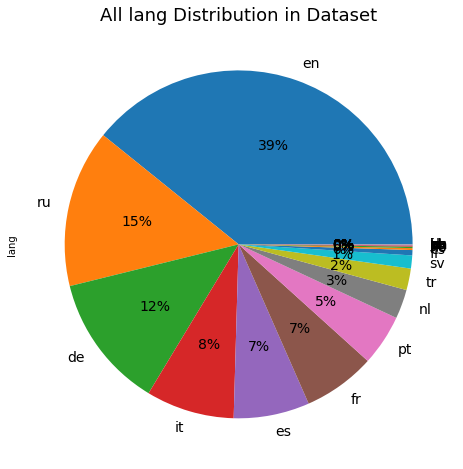

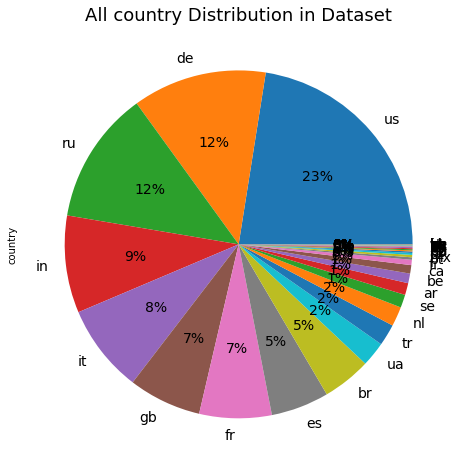

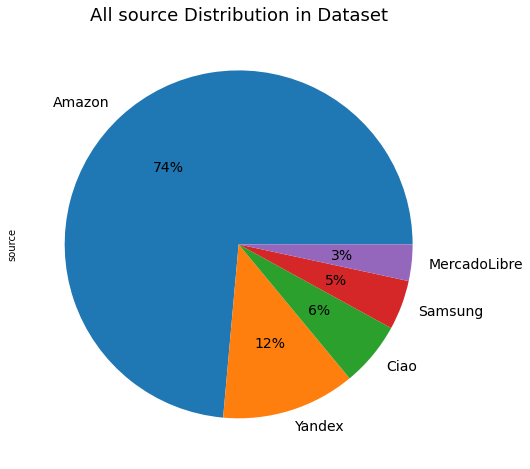

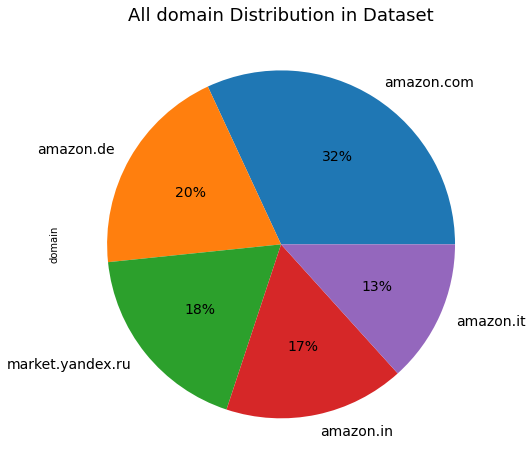

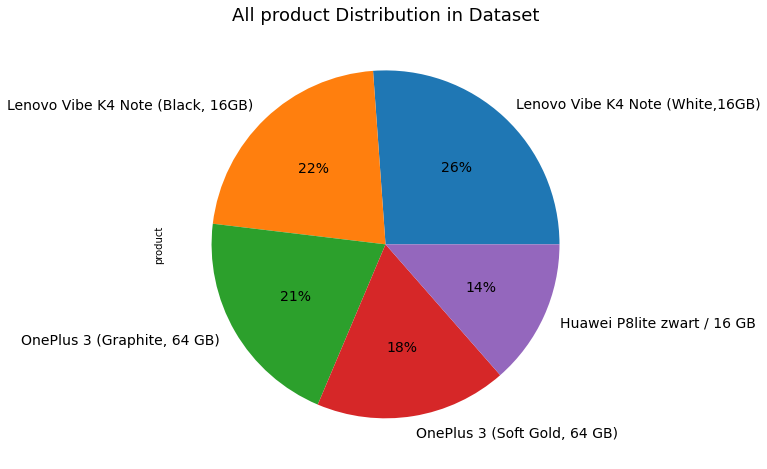

In [ ]:
pie_chart(df, 'lang')
pie_chart(df, 'country')
pie_chart(df, 'source', top=5)
pie_chart(df, 'domain', top=5)
pie_chart(df, 'product', top=5)

* From above analysis, we can see the distribution of features.
* english language (39%) is dominent as compare to other langs in e-commerce.
* Most envolve the US contry (23%) in e-commerce field.
* Most selling/buying smarphone/electronic through Amazon (74%).
* Domain amazon.com (32%) is most use as compare to other amazon domain.
* Lenovo Vibe K4 Note (White,16GB) is a demand product.

               count      mean       std   min   25%   50%   75%   max
score      1351644.0   8.00706  2.616121   0.2   7.2   9.2  10.0  10.0
score_max  1351644.0  10.00000  0.000000  10.0  10.0  10.0  10.0  10.0


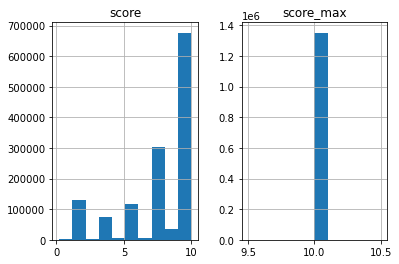

In [ ]:
print(df[['score','score_max']].describe().T)
df.select_dtypes(include=[int, float]).hist()
plt.show()

In [ ]:
# 3. Round off scores to the nearest integers.  
numeirc_cols = df.select_dtypes(include=[int, float]).columns.tolist()
for col in numeirc_cols:
    df[col] = round(df[col], 2)

In [ ]:
# 4. Check for missing values. Impute the missing values, if any.  
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [ ]:
# lets fill the miussing values of categorical features with most frequent values and
# numerical features with mean/average
for i in list(df.columns):
    if df[i].dtype == 'object':
        df[i] = df[i].fillna(df[i].mode().values[0])
    else:
        df[i] = round(df[i].fillna(df[i].mean()),2)

In [ ]:
df.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [ ]:
# 5. Check for duplicate values and remove them, if any
bool_series = df.duplicated(keep='first')
df = df[~bool_series]

In [ ]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [ ]:
# 6. Keep only 1 Million data samples. Use random state=612.  
df = df.sample(n=1000000, random_state=612).reset_index(drop=True)
print(df.shape)

(1000000, 11)


In [ ]:
# 7. Drop irrelevant features. Keep features like Author, Product, and Score.  
df = df[['author', 'product', 'score']]
df.head()

,author,product,score
0,gilay28,Nokia 6301,10.0
1,Stacy G.,"Apple iPhone 4S Verizon Cellphone, 16GB, White",10.0
2,BulldoZer,"Samsung Galaxy Note 3 Neo Smartphone (13,94 cm...",10.0
3,vinod kumar,Nokia 5030,6.0
4,Giorgio,"Huawei P9 Plus Smartphone, LTE, Display 5.5'' ...",10.0


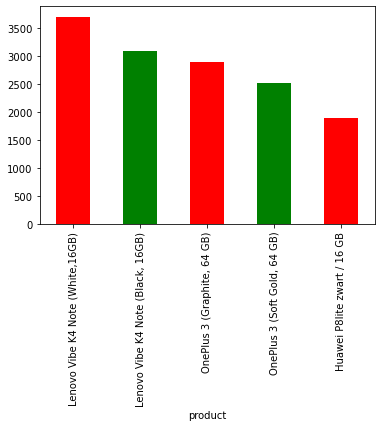

product
Lenovo Vibe K4 Note (White,16GB)     3701
Lenovo Vibe K4 Note (Black, 16GB)    3093
OnePlus 3 (Graphite, 64 GB)          2889
OnePlus 3 (Soft Gold, 64 GB)         2522
Huawei P8lite zwart / 16 GB          1895
Name: score, dtype: int64


In [ ]:
# 1. Identify the most rated products. 
top5Products = df.groupby('product')['score'].count().sort_values(ascending=False)[:5]
top5Products.plot(kind='bar', color=['Red', 'Green'])
plt.show()
print(top5Products)

* From above analysis, we can see that Lenovo Vibe K4 Note (White,16GB) is a most rated product as compare to other products.

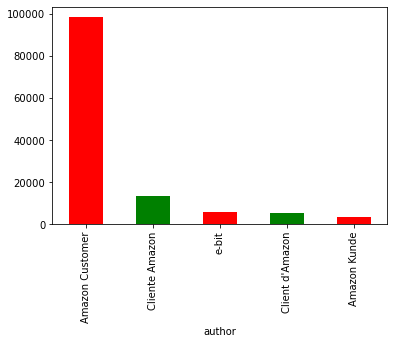

author
Amazon Customer    98479
Cliente Amazon     13634
e-bit               5948
Client d'Amazon     5500
Amazon Kunde        3307
Name: score, dtype: int64


In [ ]:
# 2. Identify the users with most number of reviews.  
top5Users = df.groupby('author')['score'].count().sort_values(ascending=False)[:5]
top5Users.plot(kind='bar', color=['Red', 'Green'])
plt.show()
print(top5Users)

* From above analysis, we can see that Amazon users is the most reviews as compare to other users.

In [ ]:
# 3. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. 
# Report the shape of the final dataset
author_df = df.author.value_counts()
product_df = df['product'].value_counts()
data_final=df[df['author'].isin(author_df[author_df>=50].index) & df['product'].isin(product_df[product_df>=50].index)]
print("Shape of Dataset:", data_final.shape)

Shape of Dataset: (131145, 3)


In [ ]:
# Count of product for each unique user as recommendation score 
data_grouped = data_final.groupby('product').agg({'author':'count','score':'mean'}).reset_index()
data_grouped.rename(columns={'author':'count','score':'mean'},inplace=True)

# Sort the product on recommendation score 
data_sort = data_grouped.sort_values(['count'], ascending = False) 
      
# Generate a recommendation rank based upon score 
data_sort['Rank'] = data_sort['count'].rank(ascending=False, method='first') 
          
# Get the top 5 recommendations 
popularity_recommendations = data_sort.reset_index(drop=True).set_index('product').head() 
popularity_recommendations 

,count,mean,Rank
product,,,
"Lenovo Vibe K4 Note (White,16GB)",2191,6.927430,1.0
"Lenovo Vibe K4 Note (Black, 16GB)",1827,6.985222,2.0
"OnePlus 3 (Graphite, 64 GB)",1305,8.536398,3.0
"OnePlus 3 (Soft Gold, 64 GB)",1234,8.312804,4.0
"Lenovo Vibe K5 (Gold, VoLTE update)",1128,6.615248,5.0


In [ ]:
# 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch
# (Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues).
# Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.  

In [ ]:
# conda install -c conda-forge scikit-surprise

In [ ]:
from surprise import Reader
from surprise import Dataset

from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
from surprise import SVD

from surprise.accuracy import rmse
from surprise.model_selection import train_test_split

In [ ]:
reader = Reader(rating_scale=(1, 50))
data = Dataset.load_from_df(data_final[['author', 'product', 'score']], reader)

In [ ]:
# test set is made of 30% of the ratings.
trainset, testset = train_test_split(data, test_size=0.3)

In [ ]:
# SVD
svd = SVD()
svd.fit(trainset)

# kNNWithMeans 
knn = KNNWithMeans()
knn.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
# predict test users from svd
predictions = svd.test(testset)
rmse_svd = rmse(predictions)

# predict test users from knn
predictions_knn = knn.test(testset)
rmse_knn = rmse(predictions_knn)

RMSE: 2.6441
RMSE: 2.6506


In [ ]:
rmse_ = pd.DataFrame([rmse_svd,rmse_knn], index = ['SVD','KNNWithMeans'], columns=['RMSE'])
rmse_

,RMSE
SVD,2.644097
KNNWithMeans,2.650554


In [ ]:
# get a prediction for specific users and items.
user = 'Amazon Customer'
product = 'OnePlus X (Onyx, 16GB)'
pred = svd.predict(user, product , verbose=False)
print(f" \n\tuser:{user}\n\tproduct:{product}\n\tRating:{round(pred.est,2)}")

 
	user:Amazon Customer
	product:OnePlus X (Onyx, 16GB)
	Rating:7.54


In [ ]:
# 6. Predict score (average rating) for test users.  

# Prediction SVD model
average_rat = pd.DataFrame(predictions)[['iid','r_ui','est']].rename(columns={'iid':'product', 'r_ui':'actual_score','est':'predicted_score'})
average_rat = average_rat.groupby('product')['actual_score','predicted_score'].mean().reset_index()
average_rat['avg_rating'] = average_rat['predicted_score']/average_rat.shape[0]
average_rat.sort_values(by=['predicted_score','avg_rating'], ascending=[0,0])

,product,actual_score,predicted_score,avg_rating
936,Huawei Honor Pro,8.285714,10.260078,0.002634
3834,Xiaomi Redmi 3,9.000000,10.153584,0.002607
1134,LG G2 T-Mobile D801,5.000000,10.039110,0.002577
1315,LG Optimus L9 (P760) - Smartphone libre Androi...,10.000000,10.000777,0.002568
3008,Samsung Galaxy S7 Edge Duos SM-G935FD 32GB Dua...,10.000000,9.996753,0.002567
...,...,...,...,...
3197,Samsung S8000 Jet,2.551724,2.772286,0.000712
1191,LG GW520,1.875000,2.051553,0.000527
3669,"Sony Xperia Z Smartphone (12,7 cm (5 Zoll) Tou...",6.000000,2.006224,0.000515
399,"BlackBerry 8220 Flip Pearl Unlocked Phone , GP...",2.000000,1.544997,0.000397


In [ ]:
# Prediction KNN model
average_rat_knn = pd.DataFrame(predictions_knn)[['iid','r_ui','est']].rename(columns={'iid':'product', 'r_ui':'actual_score','est':'predicted_score'})
average_rat_knn = average_rat_knn.groupby('product')['actual_score','predicted_score'].mean().reset_index()
average_rat_knn['avg_rating'] = average_rat_knn['predicted_score']/average_rat_knn.shape[0]
average_rat_knn.sort_values(by=['predicted_score','avg_rating'], ascending=[0,0])

,product,actual_score,predicted_score,avg_rating
1585,"Microsoft Nokia 1650 dark red (Farbdisplay, UK...",9.000,11.401389,0.002927
870,"Huawei Ascend Mate 7 Smartphone (6 Zoll (15,2 ...",9.500,11.114759,0.002854
2445,Samsung E2550 Handy (Social Networking Dienste...,8.000,10.996511,0.002823
2382,Samsung B2700 Handy (IP54-Zertifizierung) char...,10.000,10.946813,0.002810
1063,LG Electronics E440 Optimus L4 II Smartphone (...,10.000,10.946484,0.002810
...,...,...,...,...
1082,"LG Electronics GD880 Mini Smartphone (HSDPA, 5...",10.000,1.988732,0.000511
1601,"Microsoft Nokia 6700 slide Handy (UMTS, GPRS, ...",10.000,1.484016,0.000381
1191,LG GW520,1.875,1.309628,0.000336
3163,Samsung S5230 Hello Kitty Pink Unlocked GSM Qu...,10.000,1.274049,0.000327


7. Report your findings and inferences
* From above analysis, we fit the SVD and KnnwithMeans and predicted the rating against product in which predicted average rating of product `Huawei Honor Pro` is a most recommended product using SVD model.
* KnnwithMeans recommended the best product that has highest predicted average rating is `Microsoft Nokia 1650 dark red (Farbdisplay, UKW-Stereo-Radio, Organizer, Spiele) Handy`.
* SVD (0.002634) best product average rating is less than KNNwithMeans model (0.002927).
* Therefore, `Microsoft Nokia 1650 dark red (Farbdisplay, UKW-Stereo-Radio, Organizer, Spiele) Handy` is most preferable as compare to `Huawei Honor Pro

In [ ]:
# 8.Try and recommend top 5 products for test users.  

# SVD Recommended Products
print("\t\tSVD Recommended Products")
topRecommProductSVD = average_rat.sort_values(by=['avg_rating'], ascending=[0])
topRecommProductSVD['Rank'] = topRecommProductSVD['avg_rating'].rank(ascending=False, method='first')
topRecommProductSVD.reset_index(drop=True).set_index('product').head()

		SVD Recommended Products


,actual_score,predicted_score,avg_rating,Rank
product,,,,
Huawei Honor Pro,8.285714,10.260078,0.002634,1.0
Xiaomi Redmi 3,9.000000,10.153584,0.002607,2.0
LG G2 T-Mobile D801,5.000000,10.039110,0.002577,3.0
"LG Optimus L9 (P760) - Smartphone libre Android (pantalla 4.7"", cÃ¡mara 5 Mp, 4 GB, 1 GHz, 1 GB RAM), blanco (importado)",10.000000,10.000777,0.002568,4.0
"Samsung Galaxy S7 Edge Duos SM-G935FD 32GB Dual SIM Factory Unlocked GSM Smartphone - International Version, No Warranty (Titanium Silver)",10.000000,9.996753,0.002567,5.0


In [ ]:
# KNN Recommended Products
print("\t\tKNN Recommended Products")
topRecommProductKNN = average_rat_knn.sort_values(by=['avg_rating'], ascending=[0])
topRecommProductKNN['Rank'] = topRecommProductKNN['avg_rating'].rank(ascending=False, method='first')
topRecommProductKNN.reset_index(drop=True).set_index('product').head()

		KNN Recommended Products


,actual_score,predicted_score,avg_rating,Rank
product,,,,
"Microsoft Nokia 1650 dark red (Farbdisplay, UKW-Stereo-Radio, Organizer, Spiele) Handy",9.0,11.401389,0.002927,1.0
"Huawei Ascend Mate 7 Smartphone (6 Zoll (15,2 cm) Touch-Display, 16 GB Speicher, Android 4.4 ) obsidian black",9.5,11.114759,0.002854,2.0
"Samsung E2550 Handy (Social Networking Dienste, Kamera, MP3-Player) strong-black",8.0,10.996511,0.002823,3.0
Samsung B2700 Handy (IP54-Zertifizierung) charcoal-gray,10.0,10.946813,0.002810,4.0
"LG Electronics E440 Optimus L4 II Smartphone (9,6 cm (3,8 Zoll) Display, 3 Megapixel Kamera, WiFi, Android 4.1) schwarz",10.0,10.946484,0.002810,5.0


In [ ]:
# 9. Try other techniques (Example: cross validation) to get better results.  

# Run 5-fold cross-validation and print results SVD
svd_cross_validate_res = cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.6306  2.6243  2.6147  2.6397  2.6325  2.6284  0.0084  
Fit time          4.85    5.43    4.85    4.95    4.73    4.96    0.24    
Test time         0.23    0.13    0.23    0.13    0.13    0.17    0.05    


In [ ]:
print("SVD Cross Validation Results\n")
print(pd.DataFrame(svd_cross_validate_res).mean(axis = 0))

SVD Cross Validation Results

test_rmse    2.628364
fit_time     4.961449
test_time    0.168178
dtype: float64


In [ ]:
# Run 5-fold cross-validation and print results KNNwithMeans
knn_cross_validate_res = cross_validate(knn, data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.6317  2.6178  2.6249  2.6125  2.6238  2.6221  0.0065  
Fit time          0.35    0.33    0.33    0.37    0.34    0.34    0.01    
Test time         2.61    2.32    2.49    2.52    2.34    2.46    0.11    


In [ ]:
print("KNNWithMeans Cross Validation Results\n")
print(pd.DataFrame(knn_cross_validate_res).mean(axis = 0))

KNNWithMeans Cross Validation Results

test_rmse    2.622130
fit_time     0.343832
test_time    2.455751
dtype: float64


In [ ]:
# 10. In what business scenario you should use popularity based Recommendation Systems ?   

* Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.
* The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user

In [ ]:
# 11. In what business scenario you should use CF based Recommendation Systems ?   

* Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their sophisticated recommendation systems. You can use this technique to build recommenders that give suggestions to a user on the basis of the likes and dislikes of similar users
* Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.
* Collaborative Filtering based model has recommended entire different list based on the user past purchase history

In [ ]:
# 12. What other possible methods can you think of which can further improve the recommendation for different users ?

We can Improve the recommendation
* Ditch Your User-Based Collaborative Filtering Model
* A Gold Standard Similarity Computation Technique
* Boost Your Algorithm Using Model Size